# Credit Risk Modeling Machine Learning Model

## Import Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

## Analysing the Data

In [2]:
dataset = pd.read_csv('cs-training.csv')
dataset.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
dataset.shape

(150000, 12)

In [4]:
dataset.isnull().sum()

ID                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

## Data Cleaning

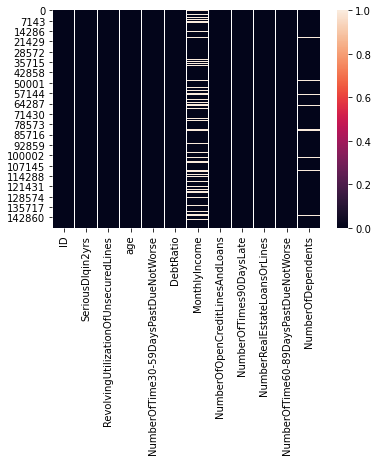

In [5]:
sn.heatmap(dataset.isnull())

In [6]:
dataset['MonthlyIncome'].value_counts().to_csv('MonthlyIncome.csv')
income_dataset = pd.read_csv('MonthlyIncome.csv')
income_dataset.columns = ['Income', 'Occurance']
income_dataset.head()

,Income,Occurance
0,5000.0,2757
1,4000.0,2106
2,6000.0,1934
3,3000.0,1758
4,0.0,1634


In [7]:
mean_val = income_dataset[income_dataset['Occurance']>1000]['Income'].mean()
dataset['MonthlyIncome'].fillna(mean_val, inplace=True)
dataset['NumberOfDependents'].value_counts()

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

In [8]:
dataset['NumberOfDependents'].fillna(dataset['NumberOfDependents'].mode()[0], inplace=True)

## Scaling The Data into Standard Form

In [9]:
X = dataset.drop(['SeriousDlqin2yrs','ID'], axis=1)
Y = dataset['SeriousDlqin2yrs']

In [10]:
from sklearn.preprocessing import StandardScaler
sc_scale = StandardScaler()
data = sc_scale.fit_transform(X)

## Model Selection

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, Y, random_state = 10)

### Using Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf_classify = RandomForestClassifier()

In [13]:
rf_classify.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
from sklearn.metrics import accuracy_score
print("Accuracy of Random Forest Model :-> ",accuracy_score(y_test, rf_classify.predict(X_test))*100,"%")

Accuracy of Random Forest Model :->  93.53866666666667 %


### Using XB Boost Classifier

In [15]:
import xgboost
xbg_classify = xgboost.XGBClassifier()

In [16]:
xbg_classify.fit(X_train, y_train)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:08:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [17]:
print("Accuracy of XG Boost Model :-> ", accuracy_score(y_test, xbg_classify.predict(X_test))*100,"%")

Accuracy of XG Boost Model :->  93.52533333333334 %


#### Using Hyperparameter Optimization

In [18]:
hyper_param = {'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth':[3,4,5,6,8,10,12,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7],
    }

In [19]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(xbg_classify,param_distributions=hyper_param,n_jobs=-1, scoring="roc_auc",cv=5, verbose=3, random_state=10)

In [20]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.3min finished
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:11:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=8,
                                           num_pa...
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, sub

In [21]:
print("Accuracy After Optimization :-> ", accuracy_score(y_test, random_search.predict(X_test))*100,"%")

Accuracy After Optimization :->  93.64266666666666 %
